In [1]:

import LIP
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import skimage
import cv2


In [7]:
def histeq(im, nbr_bins=256):
    # get image histogram
    #imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True) _deprecated
    imhist, bins = np.histogram(im.flatten(), nbr_bins, density=True)   
    cdf = imhist.cumsum()  # cumulative distribution function
    cdf = 255 * cdf / cdf[-1]  # normalize

    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(), bins[:-1], cdf)

    return im2.reshape(im.shape), cdf

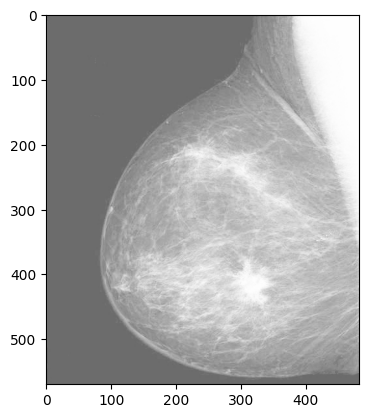

In [8]:
M = 256.
B = skimage.io.imread("breast.jpg")

plt.imshow(B, cmap=plt.cm.gray, vmin=0, vmax=M)


168.0
255.49951076274098


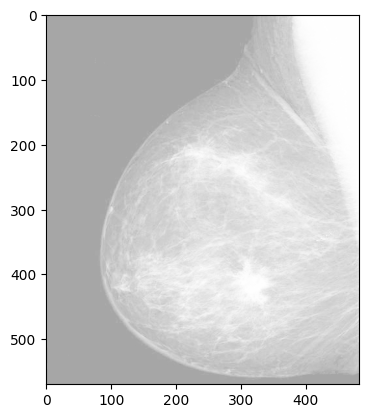

In [9]:
tone = LIP.graytone(B, M)
D = LIP.graytone(LIP.timesLIP(.5, tone, M), M)
plt.figure()
plt.imshow(D, cmap=plt.cm.gray, vmin=0, vmax=M)
print(tone.max())
print(D.max())

lambda: 5.271848


Text(0.5, 1.0, 'after histo equalization')

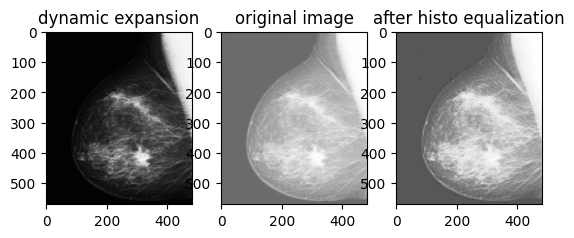

In [11]:
l = LIP.computeLambda(tone, M)
print("lambda: {0:f}".format(l))
E = LIP.graytone(LIP.timesLIP(l, tone, M), M)

# histo equalization
heq, cdf = histeq(B)

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(E/M, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('dynamic expansion')
#skimage.io.imsave("lipenhance.png", np.floor(E))
plt.subplot(1, 3, 2)
plt.imshow(B/M, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('original image')
plt.subplot(1, 3, 3)
plt.imshow(heq/M, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('after histo equalization')
#skimage.io.imsave("histeq.png", np.floor(heq))


Text(0.5, 1.0, 'LIP Sobel edge detection')

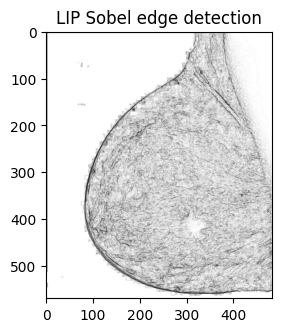

In [13]:

# contours detection
# Sobel detection
def Sobel(I):
    sobx = cv2.Sobel(I, -1, 1, 0)
    soby = cv2.Sobel(I, -1, 0, 1)
    sob = np.sqrt(sobx**2 + soby**2)
    return sob


# go into LIP space
tonelip = LIP.phi(tone, M)

# apply Sobel filter
sobellip = LIP.graytone(LIP.invphi(Sobel(tonelip), M), M)
#skimage.io.imsave("sobellip.png", sobellip)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(sobellip, cmap=plt.cm.gray)
plt.title('LIP Sobel edge detection')


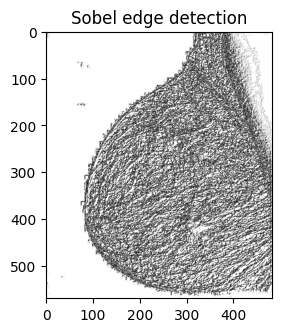

In [15]:

# apply Sobel filter in the classic space
sobel = 255.0-Sobel(B)
plt.subplot(1, 2, 2)
plt.imshow(sobel.astype(np.float32), cmap=plt.cm.gray)
plt.title('Sobel edge detection')
plt.show()
#skimage.io.imsave("sobel.png", sobel)